## Importing libraries

Importing basic math and visualization libraries

In [122]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Loading the dataset

Reading the dataset and checking its head

In [123]:
df = pd.read_csv("BankChurners.csv")

In [124]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Information about the dataset

Getting basic details about the dataset

In [125]:
# shape of the dataset
df.shape

(10127, 23)

In [126]:
# getting features from dataframe
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [127]:
# we don't need the client number and Naive Bayes columns 
df = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [128]:
# getting the total size of the dataset
df.size

202540

In [129]:
# datatype and other info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Cleaning the dataset

Checking null values and cleaning the dataset

<AxesSubplot:>

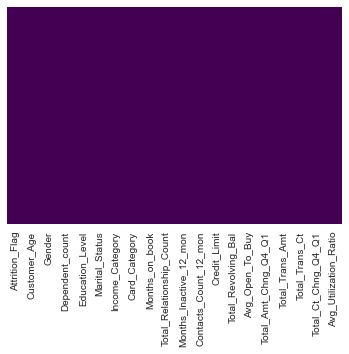

In [130]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
# visualizing the null values in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [131]:
# finding duplicate values
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


## Getting data statistics

Describing the dataset

In [132]:
# describing categorical features
df.describe(exclude = ['float', 'int64']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [133]:
# describing numerical features
df.describe(exclude = ['object']).T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


## Mapping categorical attributes

Converting categorical values to numerical

In [134]:
# converting the Attrition_Flag to 0 and 1
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

## Exploratory Data Analysis

Performing visualization on the dataset

Unique attribution flag elements: 
0    8500
1    1627
Name: Attrition_Flag, dtype: int64


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

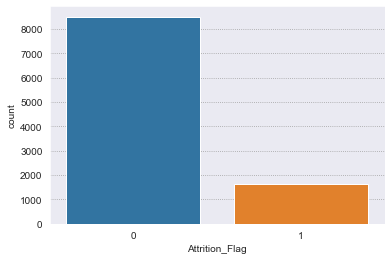

In [135]:
# count of attrition
print("Unique attribution flag elements: ")
print(df["Attrition_Flag"].value_counts())
sns.countplot(df["Attrition_Flag"])

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

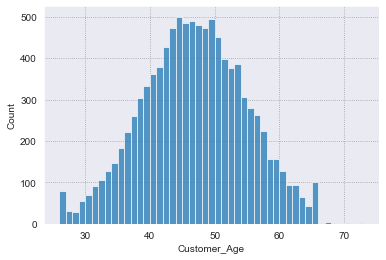

In [136]:
# distribution of age
sns.histplot(df['Customer_Age'])

<AxesSubplot:xlabel='Customer_Age'>

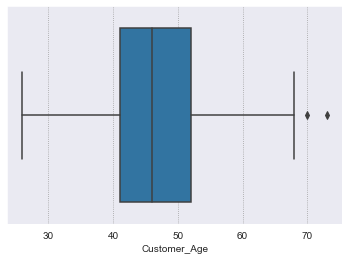

In [137]:
sns.boxplot(df['Customer_Age'])

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

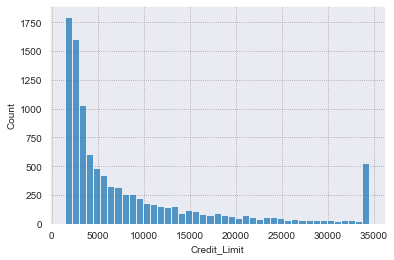

In [138]:
# distribution of credit limit
sns.histplot(df['Credit_Limit'])

<AxesSubplot:xlabel='Credit_Limit'>

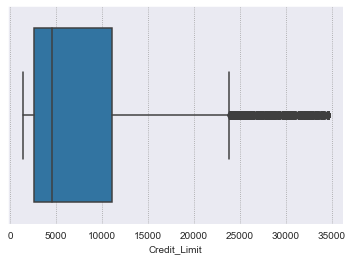

In [139]:
sns.boxplot(df['Credit_Limit'])

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

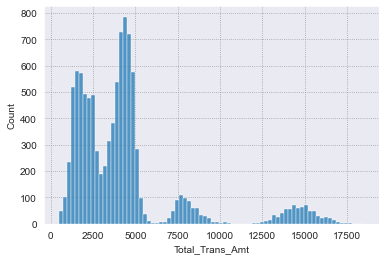

In [140]:
# distribution of total transaction amount
sns.histplot(df['Total_Trans_Amt'])

<AxesSubplot:xlabel='Total_Trans_Amt'>

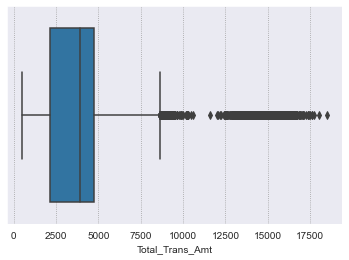

In [141]:
sns.boxplot(df['Total_Trans_Amt'])

Text(0.5, 1.0, 'Proportion of Gender')

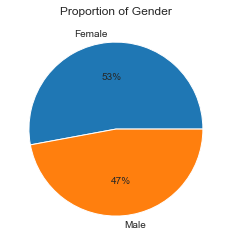

In [142]:
# getting the proportion of male and female customers
plt.pie(df["Gender"].value_counts(), labels=["Female", "Male"], autopct="%.0f%%")
plt.title("Proportion of Gender")

Text(0.5, 1.0, 'Proportion of Marital Status')

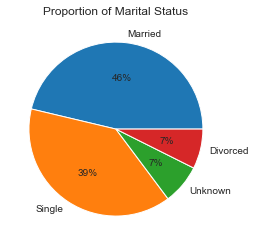

In [143]:
# getting the proportion of the marital status of customers
plt.pie(df["Marital_Status"].value_counts(), labels=["Married", "Single", "Unknown", "Divorced"], autopct="%.0f%%")
plt.title("Proportion of Marital Status")

Text(0.5, 1.0, 'Proportion of Education Levels')

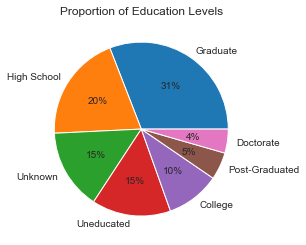

In [144]:
# getting the proportion of the marital status of customers
plt.pie(df["Education_Level"].value_counts(), labels=["Graduate", "High School", "Unknown", "Uneducated", "College", "Post-Graduated", "Doctorate"], autopct="%.0f%%")
plt.title("Proportion of Education Levels")

Text(0.5, 1.0, 'Proportion of Income Levels')

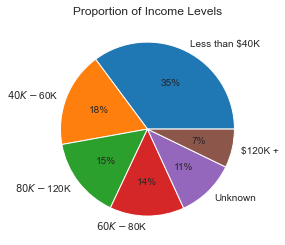

In [145]:
# getting the proportion of different income of customers
plt.pie(df["Income_Category"].value_counts(), labels = [
 'Less than $40K',
 '$40K - $60K',
 '$80K - $120K',
 '$60K - $80K',
 'Unknown',
 '$120K +'], autopct="%.0f%%")
plt.title("Proportion of Income Levels")

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

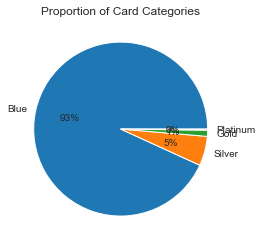

In [146]:
# getting the proportion of card categories of customers
plt.pie(df["Card_Category"].value_counts(), labels=["Blue", "Silver", "Gold", "Platinum"], autopct="%.0f%%")
plt.title("Proportion of Card Categories")
df["Card_Category"].value_counts()

Text(0.5, 1.0, 'Proportion of Attrited customer')

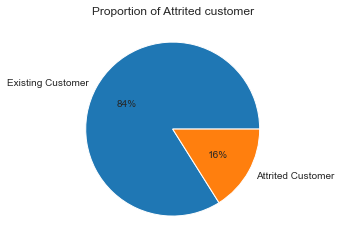

In [147]:
# getting the proportion of attrition of customers
plt.pie(df["Attrition_Flag"].value_counts(), labels=["Existing Customer", "Attrited Customer"], autopct="%.0f%%")
plt.title("Proportion of Attrited customer")

<AxesSubplot:>

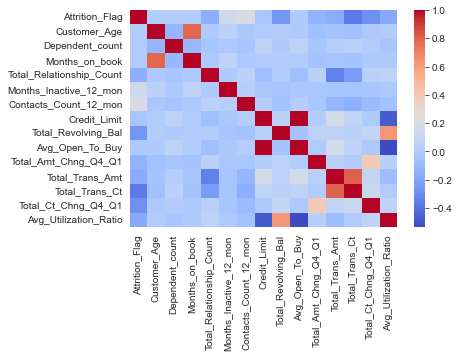

In [148]:
# getting a heatmap to obtain categorical features
sns.heatmap(df.corr(), cmap="coolwarm")

## Hot encoding categorical values to numerical

Performing encoding to convert categorical values to numerical

In [149]:
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
df_new.shape

(10127, 38)

In [150]:
df_new.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Plat

In [151]:
#Rearrangement of the columns......
df = df_new[[ 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver','Attrition_Flag']]

## Scaling the dataset

Normalizing the dataset

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('Attrition_Flag',axis=1))
scaled_features = scaler.transform(df.drop('Attrition_Flag',axis=1))

In [153]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])

## Splitting the dataset

Training and Testing the dataset

In [154]:
X = scaled_features
y = df['Attrition_Flag']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30)

## Creating a Machine Learning model

Fitting the data to a model and testing it's accuracy

### ModelOne: Logistic Regression

In [155]:
# import the model
from sklearn.linear_model import LogisticRegression

In [156]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [157]:
y_pred = log.predict(X_test)

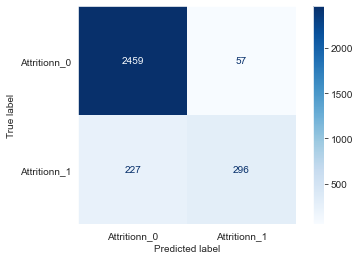

In [158]:
plot_confusion_matrix(log,
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Attritionn_0','Attritionn_1'])
plt.grid(False)
plt.show();

In [159]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2459   57]
 [ 227  296]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2516
           1       0.84      0.57      0.68       523

    accuracy                           0.91      3039
   macro avg       0.88      0.77      0.81      3039
weighted avg       0.90      0.91      0.90      3039



In [160]:
print(accuracy_score(y_test, y_pred))

0.9065482066469234


In [161]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.09345179335307667
MSE: 0.09345179335307667
RMSE: 0.30569886056882295


### ModelTwo: Support Vector Machine

In [162]:
# import the model
from sklearn.svm import SVC

In [163]:
svc = SVC() #set the model
svc.fit(X_train,y_train) # fit the data
y_pred = svc.predict(X_test) # perform predictions

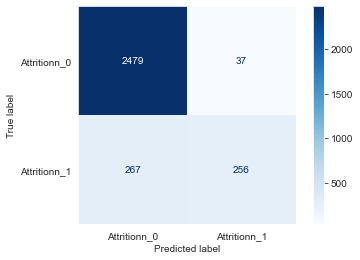

In [164]:
plot_confusion_matrix(svc,
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Attritionn_0','Attritionn_1'])
plt.grid(False)
plt.show();

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2516
           1       0.87      0.49      0.63       523

    accuracy                           0.90      3039
   macro avg       0.89      0.74      0.78      3039
weighted avg       0.90      0.90      0.89      3039



In [166]:
print(accuracy_score(y_test, y_pred))

0.8999670944389602


In [167]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.10003290556103982
MSE: 0.10003290556103982
RMSE: 0.31627978999778


### ModelThree: Decision Tree Classifier

In [168]:
# importing the model
from sklearn.tree import DecisionTreeClassifier

In [169]:
dtc = DecisionTreeClassifier() # set the model
dtc.fit(X_train, y_train) # fit the data
y_pred = dtc.predict(X_test) #perform predictions

In [170]:
# importing the metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, plot_confusion_matrix

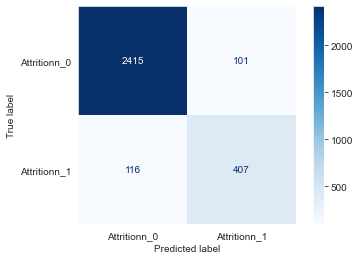

In [171]:
plot_confusion_matrix(dtc,
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Attritionn_0','Attritionn_1'])
plt.grid(False)
plt.show();

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2516
           1       0.80      0.78      0.79       523

    accuracy                           0.93      3039
   macro avg       0.88      0.87      0.87      3039
weighted avg       0.93      0.93      0.93      3039



In [173]:
print(accuracy_score(y_test, y_pred))

0.9285949325435998


In [174]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07140506745640013
MSE: 0.07140506745640013
RMSE: 0.2672172663889819


## Hyper parameter tuning

Choosing optimal parameters for the best accuracy

In [175]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [176]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)    

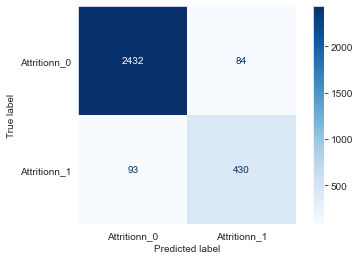

In [177]:
plot_confusion_matrix(dtc,
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Attritionn_0','Attritionn_1'])
plt.grid(False)
plt.show();

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2516
           1       0.84      0.82      0.83       523

    accuracy                           0.94      3039
   macro avg       0.90      0.89      0.90      3039
weighted avg       0.94      0.94      0.94      3039



In [179]:
print(accuracy_score(y_test, y_pred))

0.9417571569595261


In [180]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.05824284304047384
MSE: 0.05824284304047384
RMSE: 0.24133554035921406


## Feature Importance

Discussing important feature wrt DTC

In [181]:
# top five importnt features
feature = pd.Series(dtc.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature.head()

Total_Trans_Ct              0.377921
Total_Trans_Amt             0.200505
Total_Revolving_Bal         0.158441
Total_Ct_Chng_Q4_Q1         0.079079
Total_Relationship_Count    0.076719
dtype: float64

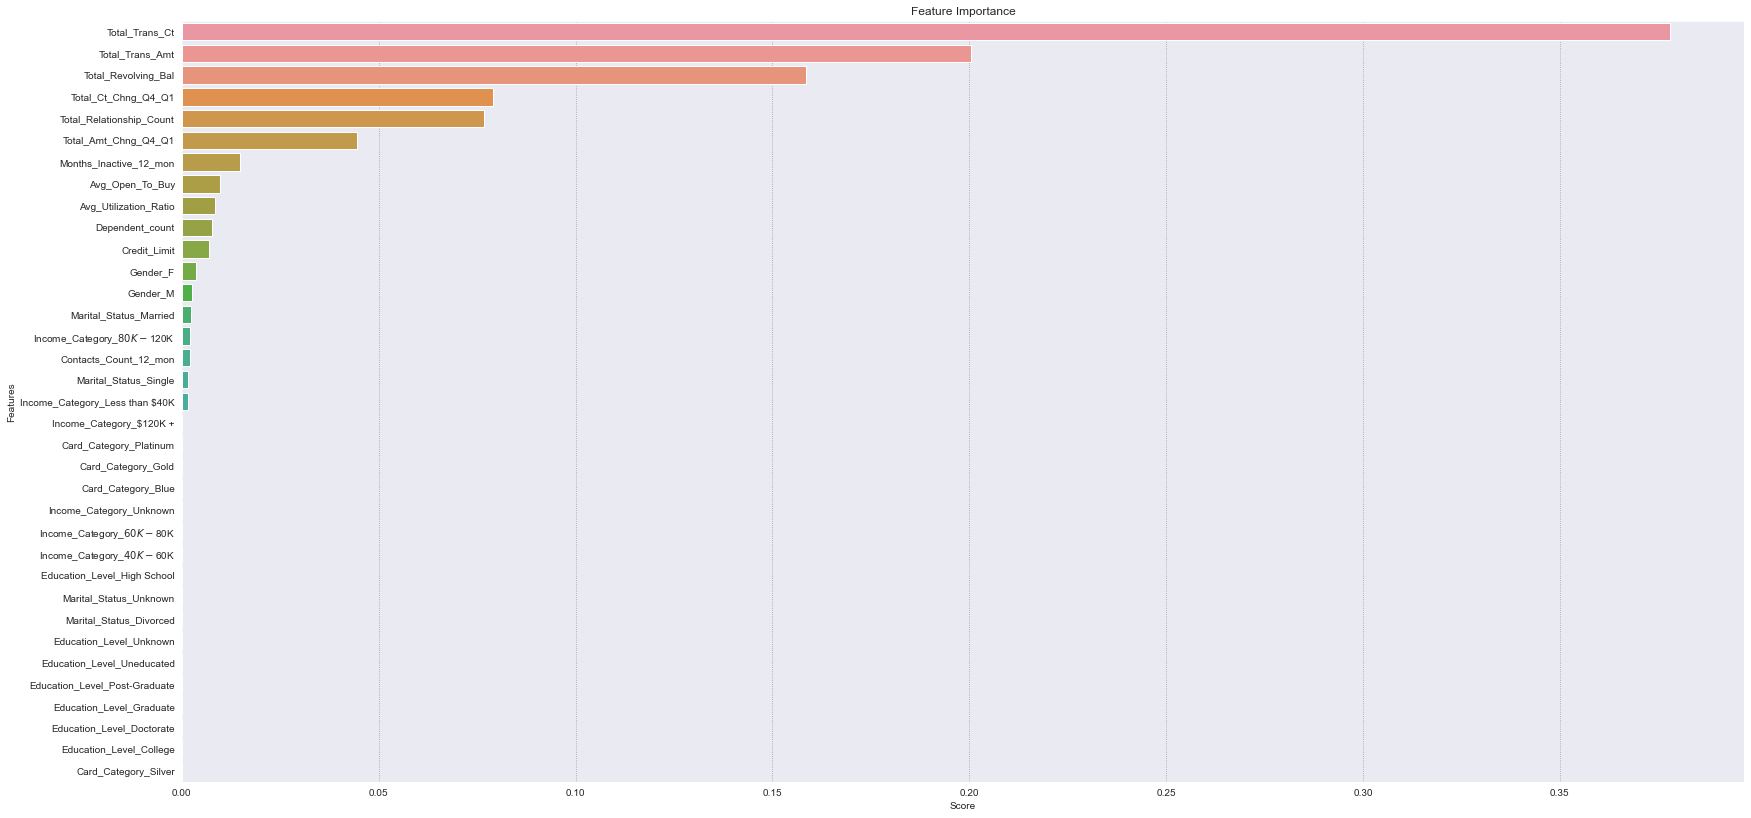

In [182]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()